In [10]:
import pandas as pd
import networkx as nx
import numpy as np

folder = "64K_5_v2_s1"

accounts_df = pd.read_csv("../datasets/"+folder+"/account_attributes.csv")
transactions_df = pd.read_csv("../datasets/"+folder+"/transactions.csv")

nodes_df = accounts_df
edges_df = transactions_df

In [4]:
edges_df

,tran_id,orig_acct,bene_acct,tx_type,base_amt,tran_timestamp,is_sar,alert_id
0,1,9913,604,TRANSFER,172.98,2017-01-01T00:00:00Z,False,-1
1,2,10533,40,TRANSFER,101.46,2017-01-01T00:00:00Z,False,-1
2,3,7901,203,TRANSFER,560.88,2017-01-01T00:00:00Z,False,-1
3,4,7905,27,TRANSFER,451.74,2017-01-01T00:00:00Z,False,-1
4,5,12418,45,TRANSFER,603.05,2017-01-01T00:00:00Z,False,-1
...,...,...,...,...,...,...,...,...
1428839,1428840,1571,195,TRANSFER,342.35,2018-12-21T00:00:00Z,False,-1
1428840,1428841,1571,195,TRANSFER,871.16,2018-12-21T00:00:00Z,False,-1
1428841,1428842,1046,31,TRANSFER,372.83,2018-12-21T00:00:00Z,False,-1
1428842,1428843,20001,311,TRANSFER,40.87,2018-12-21T00:00:00Z,False,-1


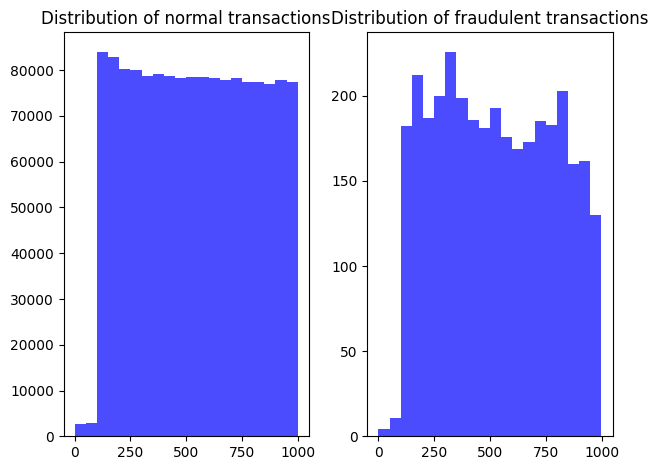

In [11]:
import matplotlib.pyplot as plt


# Create a figure
fig = plt.figure()

# Create individual subplots using the add_subplot method
ax1 = fig.add_subplot(121)  # 2x2 grid, 1st subplot
ax2 = fig.add_subplot(122)  # 2x2 grid, 2nd subplot

# Plot in each subplot
data = edges_df.base_amt[edges_df.is_sar == False]
ax1.hist(data, bins=20, color='blue', alpha=0.7)
ax1.set_title('Distribution of normal transactions')

data = edges_df.base_amt[edges_df.is_sar == True]
ax2.hist(data, bins=20, color='blue', alpha=0.7)
ax2.set_title('Distribution of fraudulent transactions')


# You can also adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

In [12]:
nodes_df

,ED,SED,comm_size,GAW,GAW10,GAW20,Std_Degree,node_amt_total_in,node_amt_min_in,node_amt_max_in,...,node_amt_min_out,node_amt_max_out,node_amt_mean_out,node_amt_median_out,node_amt_std_out,node_deg_out,node_deg_out_unique,node_deg_total,id,node_isSar
0,0.004868,0.000010,475.0,0.000000,0.000000,0.000000,3.758883,163554.32,23.58,997.60,...,105.43,995.32,562.184829,551.420,261.558899,205.0,103.0,497.0,0.0,0.0
1,0.006926,0.000022,312.0,0.000000,0.000000,0.000000,3.621809,262283.56,40.65,999.20,...,107.64,994.68,569.995512,549.710,256.344024,205.0,103.0,668.0,1.0,0.0
2,0.004408,0.000008,536.0,0.000000,0.000000,0.000000,7.322813,968667.26,23.45,999.93,...,100.89,995.73,566.477233,570.865,256.514710,206.0,103.0,1959.0,2.0,0.0
3,0.008506,0.000033,258.0,0.000000,0.000000,0.000000,7.322813,763995.62,5.18,999.80,...,103.18,999.41,551.674190,546.865,272.328168,210.0,108.0,1613.0,3.0,1.0
4,0.006193,0.000017,359.0,0.000000,0.000000,0.000000,15.437606,2839487.21,18.65,999.95,...,104.80,990.96,532.573786,512.060,257.661214,206.0,103.0,5425.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64140,0.000000,0.000000,1.0,3.090529,3.090529,3.090529,-0.106610,0.00,0.00,0.00,...,0.00,0.00,0.000000,0.000,0.000000,0.0,0.0,0.0,64140.0,0.0
64141,0.000000,0.000000,1.0,3.090529,3.090529,3.090529,-0.106610,0.00,0.00,0.00,...,0.00,0.00,0.000000,0.000,0.000000,0.0,0.0,0.0,64141.0,0.0
64142,0.000000,0.000000,1.0,3.090529,3.090529,3.090529,-0.106610,0.00,0.00,0.00,...,0.00,0.00,0.000000,0.000,0.000000,0.0,0.0,0.0,64142.0,0.0
64143,0.000000,0.000000,1.0,3.090529,3.090529,3.090529,-0.106610,0.00,0.00,0.00,...,0.00,0.00,0.000000,0.000,0.000000,0.0,0.0,0.0,64143.0,0.0
